# **<span style="color:#996633"  >Song Recommendation</span>**

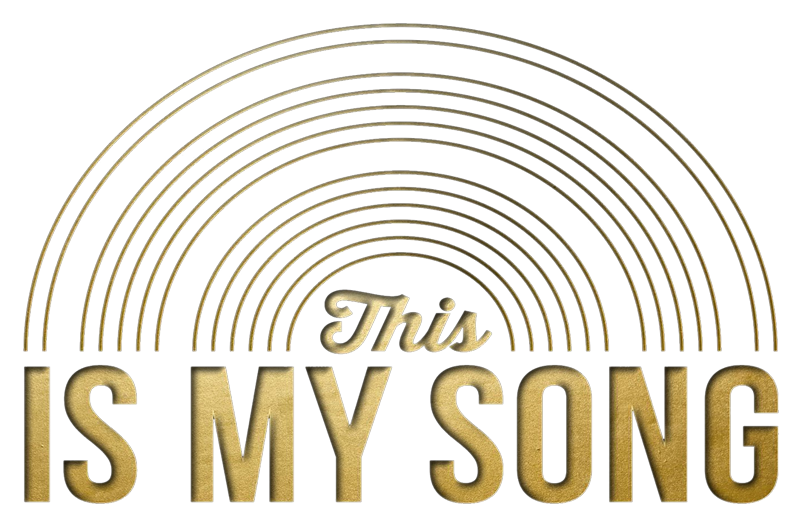

In [2]:
import pandas as pd


In [2]:
df = pd.read_csv('spotify.csv')

In [3]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [9]:
df.duplicated().sum()

0

**Text Cleaning/ Text Preprocessing**

In [10]:
df = df.sample(5000).drop('link',axis=1).reset_index(drop=True)

In [11]:
df.head(5)

,artist,song,text
0,Billie Holiday,Body And Soul,My days have grown so lonely \r\nFor you I cr...
1,Soundgarden,Black Saturday,"Promise something, \r\nKill me right away if ..."
2,Hillsong,Reaching For You,I can't believe the way Your love has got a ho...
3,Natalie Grant,Finally Home,"I am here alone, in the falling snow, \r\nAnd..."
4,Kate Bush,Don't Push Your Foot On The Heartbrake,Emma's come down. \r\nShe's stopped the light...


In [17]:
df['text'][1]

"Promise something,  \r\nKill me right away if I start to get slow  \r\nAnd don't remember  \r\nHow to separate the worm from the apple  \r\nDon't wait 'til tomorrow,  \r\nKill me right away if I start to listen  \r\nTo the voices  \r\nTelling all the mouths what they need to swallow  \r\n  \r\nDo that for me, it's the least that you can do  \r\nDon't be afraid, I would do the same for you  \r\nBurn out any memory of me ever breathing  \r\n'Til I'm born again  \r\n  \r\nI was thirsty,  \r\nI remember that you gave me some water  \r\nI was angry  \r\nEverything at once you gave me no trouble  \r\nI was crying,  \r\nI remember that you gave me your shoulder  \r\n  \r\nDo that for me, it's the least that you can do  \r\nDon't be afraid, I would do the same for you  \r\nBurn out any memory of me ever breathing  \r\n'Til I'm born again, born again  \r\n  \r\nDo that for me, it's the least that you can do  \r\nDon't be afraid, I would do the same for you  \r\nBurn out any memory of me ever b

In [38]:
df['text'] = df['text'].str.lower().replace(r'^\w|\s+','').replace(r'\n|\r','',regex=True).replace(r'\(|\)|\[|\]|\?','',regex=True)

In [39]:
df['song'] = df['song'].str.lower().replace(r'\?','',regex= True)

**add new column**

In [83]:
genre_keywords = {
    'Rock': ['freedom', 'road', 'fight', 'dream'],
    'Rap/Hip Hop': ['money', 'streets', 'life', 'dream'],
    'Classical': ['piano', 'symphony', 'orchestra', 'harmony', 'concerto',  
        'sonata',  'composer',  'melody',  'chamber', 'classical', 'elegance', 'timeless', 'virtuoso', 'recital', 
        'artistry', 'solo',  'allegro',  'adagio',  'forte', 'legato'],
    'Jazz': ['night', 'cool', 'blue', 'soul'],
    'Blues': ['blues', 'pain', 'lonely', 'cry'],
    'Country': ['home', 'road', 'cowboy', 'truck'],
    'Electronic': ['beat', 'night', 'dance', 'bass'],
    'Pop': [ 'heart','love', 'baby', 'dance'],
    'Reggae': ['love','peace', 'freedom', 'Jah'],
    'Metal': ['death', 'power', 'darkness', 'soul'],
    'Folk': ['mountain', 'river', 'folk', 'home'],
    'R&B': ['feel', 'love', 'soul', 'touch'],
}
def genres(text):
    for genre, keywords in genre_keywords.items():
        if any(keyword in text for keyword in keywords):
            return genre
    return 'Ambient'

df['Genre'] = df['text'].apply(genres)


In [84]:
df.head(15)

,artist,song,text,Genre
0,Billie Holiday,body and soul,"my days have grown so lonely for you i cry, f...",Rap/Hip Hop
1,Soundgarden,black saturday,"promise something, kill me right away if i st...",Blues
2,Hillsong,reaching for you,i can't believe the way your love has got a ho...,Rap/Hip Hop
3,Natalie Grant,finally home,"i am here alone, in the falling snow, and the...",Rock
4,Kate Bush,don't push your foot on the heartbrake,emma's come down. she's stopped the light sh...,Rock
5,The Beatles,free as a bird,free as a bird it's the next best thing to be...,Rap/Hip Hop
6,Michael Buble,summer wind,the summer wind came blowin' in from across t...,Jazz
7,Chicago,now that you've gone,take a closer look inside yourself you may se...,Rap/Hip Hop
8,Judas Priest,metal meltdown,something's calling in the night electric mad...,Jazz
9,Chaka Khan,betcha i,chorus: i betcha i betcha i can betcha i ca...,Pop


In [85]:
df['Genre'].value_counts()

Genre
Rock           1389
Jazz           1014
Rap/Hip Hop     972
Pop             568
Ambient         316
Blues           298
Country         134
R&B              91
Electronic       88
Classical        65
Metal            35
Reggae           16
Folk             14
Name: count, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  5000 non-null   object
 1   song    5000 non-null   object
 2   text    5000 non-null   object
 3   Genre   5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


In [90]:
#df.to_csv('song_genre.csv')

In [3]:
import pandas as pd
dff = pd.read_csv('song_genre.csv')

In [4]:
dff = dff.drop('Unnamed: 0',axis=1).reset_index(drop=True)

In [5]:
dff['text'][:5]

0    my days have grown so lonely  for you i cry, f...
1    promise something,  kill me right away if i st...
2    i can't believe the way your love has got a ho...
3    i am here alone, in the falling snow,  and the...
4    emma's come down.  she's stopped the light  sh...
Name: text, dtype: object

In [6]:
dff.head(5)

,artist,song,text,Genre
0,Billie Holiday,body and soul,"my days have grown so lonely for you i cry, f...",Rap/Hip Hop
1,Soundgarden,black saturday,"promise something, kill me right away if i st...",Blues
2,Hillsong,reaching for you,i can't believe the way your love has got a ho...,Rap/Hip Hop
3,Natalie Grant,finally home,"i am here alone, in the falling snow, and the...",Rock
4,Kate Bush,don't push your foot on the heartbrake,emma's come down. she's stopped the light sh...,Rock


**Tokenization:**

In [7]:
import nltk
from nltk.stem.porter import PorterStemmer

In [8]:
stemm = PorterStemmer()

def tokenization(txt):
    token = nltk.word_tokenize(txt)
    stemming = [stemm.stem(w) for w in token]
    return " ".join(stemming)

In [9]:
import nltk.tokenize
nltk.data.path.append("C:/Users/TEC-GATE/nltk_data/packages/")

In [10]:
dff['text'] = dff['text'].apply(lambda x:tokenization(x))

**Model**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
vector = TfidfVectorizer(analyzer= 'word',stop_words='english')
x = vector.fit_transform(dff['text'])
similarty = cosine_similarity(x)


**1- The model recommends by full name.** <br>
**2- The model recommends by part name.** <br>
**3- search songs by songs or text.**

In [21]:
# 1 
def recommendation_song(song):
    song = song.lower()
    dff['song'] = dff['song'].str.lower()
    if song in dff['song'].values:
        idx_song =dff[dff['song'] == song].index[0] 
        distances = sorted(list(enumerate(similarty[idx_song])),reverse = True, key= lambda x:x[1])
        songs=[]
        for s_s in distances[:15]:
            songs.append(dff.iloc[s_s[0]].song)   
    else:
        return 'Song not found'

    return songs
        

In [36]:
recommendation_song('the girl next door')

['the girl next door',
 'we were born for this',
 'shake the planet',
 'old blue jeans',
 "it's me",
 "this one's for the girls",
 'a millie sold (remix)',
 'bohemian like you - the dandy warhols',
 'selfish jean',
 'bad girls',
 'fly girl',
 'that girl',
 'every woman in the world',
 'slipped away',
 "80's"]

In [40]:
# 2
def recommedation_song_serch(song):
    song = song.lower()
    song = ' '.join(song.split())
    dff['song'] = dff['song'].str.lower()

    song_dff = dff[dff['song'].str.contains(song, case = False, na = False)|
                    dff['text'].str.contains(song, case = False, na = False)]
    song_list = song_dff['song'].tolist()
    sorted_song = sorted(song_list, reverse=True, key = lambda x:x.startswith(song))
    
    return recommendation_song(sorted_song[0]) if sorted_song else 'Song not found'

In [77]:
recommedation_song_serch('The girl n')

['the girl next door',
 'we were born for this',
 'shake the planet',
 'old blue jeans',
 "it's me",
 "this one's for the girls",
 'a millie sold (remix)',
 'bohemian like you - the dandy warhols',
 'selfish jean',
 'bad girls',
 'fly girl',
 'that girl',
 'every woman in the world',
 'slipped away',
 "80's"]

In [74]:
# 3
def search_song(song):
    song = song.lower()
    song = ' '.join(song.split())

    song_dff = dff[dff['song'].str.contains(song, case = False, na = False)| dff['text'].str.contains(song, case = False, na = False)]
    song_list = song_dff['song'].tolist()

    sorted_song = sorted(song_list, reverse = True, key = lambda x:x.startswith(song))
    top_song = sorted_song[:15]
    return top_song if top_song else 'Song not found'

In [75]:
search_song('black')

['black saturday',
 'black republicans',
 'black eyed girl',
 'black eye',
 'black, red, yellow',
 'blackcat',
 'black girl',
 'black fly',
 'black',
 'black coffee',
 'black night',
 'blackjack county chain',
 'black sheep of the family',
 'black magic',
 'black hearted woman']